# 导入库

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import pandas as pd
from sklearn.utils import shuffle as reset
def train_test_split(data, test_size=0.3, shuffle=True, random_state=None):
    '''Split DataFrame into random train and test subsets
    
    Parameters
    ----------
    data : pandas dataframe, need to split dataset.
    
    test_size : float
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split.
        
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
    shuffle : boolean, optional (default=None)
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.
    '''

    if shuffle:
        data = reset(data, random_state=random_state)
	
    train = data[int(len(data)*test_size):].reset_index(drop = True)
    test  = data[:int(len(data)*test_size)].reset_index(drop = True)
    
    return train, test


# 导入数据集

In [2]:
''' 
data = TabularDataset('数据集/card_transdata.csv')
#subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data,test_data = train_test_split(data, test_size=0.90)#= data.iloc[:subsample_size,:]#.sample(n=subsample_size, random_state=0)
print(train_data.size)
train_data.head() '''

" \ndata = TabularDataset('数据集/card_transdata.csv')\n#subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values\ntrain_data,test_data = train_test_split(data, test_size=0.90)#= data.iloc[:subsample_size,:]#.sample(n=subsample_size, random_state=0)\nprint(train_data.size)\ntrain_data.head() "

In [7]:
'''train_data.to_csv("train_Data.csv")
test_data.to_csv("test_Data.csv")
''''''

SyntaxError: EOF while scanning triple-quoted string literal (587605680.py, line 3)

In [3]:
train_data = pd.read_csv("train_Data.csv")
test_data = pd.read_csv("test_Data.csv")


# 设置预测的行/列

In [4]:
label = 'fraud'
print("Summary of class variable: \n", train_data[label].describe())
save_path = 'agModels-predictClass'  # specifies folder to store trained models

Summary of class variable: 
 count    100000.00000
mean          0.08718
std           0.28210
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: fraud, dtype: float64


In [34]:

predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    100000
Train Data Columns: 7
Label Column: fraud
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    20

In [7]:
#test_data = data.iloc[subsample_size:800,:]#.sample(n=subsample_size, random_state=0)
print(test_data)
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

        Unnamed: 0  distance_from_home  distance_from_last_transaction  \
0                0           20.594663                        0.477774   
1                1           17.091818                        0.638001   
2                2          622.058157                       97.682895   
3                3            2.366865                        1.381239   
4                4           18.048724                        0.129643   
...            ...                 ...                             ...   
899995      899995           16.502683                        5.376108   
899996      899996          219.413063                        1.318649   
899997      899997           10.509256                        5.511295   
899998      899998            9.700450                        1.220476   
899999      899999           27.911637                        1.690803   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             0.136890   

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0,20.594663,0.477774,0.136890,1.0,0.0,0.0,1.0
1,1,17.091818,0.638001,2.183429,1.0,0.0,0.0,1.0
2,2,622.058157,97.682895,3.566953,1.0,0.0,0.0,0.0
3,3,2.366865,1.381239,0.653743,1.0,0.0,0.0,1.0
4,4,18.048724,0.129643,3.520661,1.0,1.0,1.0,1.0


In [8]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
print(perf)

Predictions:  
 0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
899995    0.0
899996    1.0
899997    0.0
899998    0.0
899999    0.0
Name: fraud, Length: 900000, dtype: float64
{'accuracy': 0.9999288888888889, 'balanced_accuracy': 0.9996162978031218, 'mcc': 0.9995542858142105, 'f1': 0.9995931703472036, 'precision': 0.9999491281842577, 'recall': 0.9992374658448243}


In [15]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.999930,0.9996,6.995295,0.065721,5.554924,6.995295,0.065721,5.554924,1,True,5
1,WeightedEnsemble_L2,0.999929,1.0000,7.126944,0.077688,7.537612,0.057846,0.003990,1.117499,2,True,14
2,RandomForestEntr,0.999929,0.9996,7.182835,0.113723,7.200182,7.182835,0.113723,7.200182,1,True,6
3,ExtraTreesGini,0.998613,0.9988,11.418946,0.128654,3.819274,11.418946,0.128654,3.819274,1,True,8
4,ExtraTreesEntr,0.998561,0.9984,7.535860,0.116687,4.428647,7.535860,0.116687,4.428647,1,True,9
5,XGBoost,0.997817,0.9976,0.701125,0.021942,0.349061,0.701125,0.021942,0.349061,1,True,11
6,CatBoost,0.997748,0.9988,0.073802,0.007977,0.865189,0.073802,0.007977,0.865189,1,True,7
7,NeuralNetTorch,0.997674,0.9984,11.233155,0.039893,322.681885,11.233155,0.039893,322.681885,1,True,12
8,LightGBMLarge,0.997108,0.9976,0.719077,0.019947,0.693143,0.719077,0.019947,0.693143,1,True,13
9,LightGBM,0.996603,0.9980,0.305184,0.013961,0.439823,0.305184,0.013961,0.439823,1,True,4


In [16]:
layer = _

In [17]:
layer

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.999930,0.9996,6.995295,0.065721,5.554924,6.995295,0.065721,5.554924,1,True,5
1,WeightedEnsemble_L2,0.999929,1.0000,7.126944,0.077688,7.537612,0.057846,0.003990,1.117499,2,True,14
2,RandomForestEntr,0.999929,0.9996,7.182835,0.113723,7.200182,7.182835,0.113723,7.200182,1,True,6
3,ExtraTreesGini,0.998613,0.9988,11.418946,0.128654,3.819274,11.418946,0.128654,3.819274,1,True,8
4,ExtraTreesEntr,0.998561,0.9984,7.535860,0.116687,4.428647,7.535860,0.116687,4.428647,1,True,9
5,XGBoost,0.997817,0.9976,0.701125,0.021942,0.349061,0.701125,0.021942,0.349061,1,True,11
6,CatBoost,0.997748,0.9988,0.073802,0.007977,0.865189,0.073802,0.007977,0.865189,1,True,7
7,NeuralNetTorch,0.997674,0.9984,11.233155,0.039893,322.681885,11.233155,0.039893,322.681885,1,True,12
8,LightGBMLarge,0.997108,0.9976,0.719077,0.019947,0.693143,0.719077,0.019947,0.693143,1,True,13
9,LightGBM,0.996603,0.9980,0.305184,0.013961,0.439823,0.305184,0.013961,0.439823,1,True,4


In [75]:
models = layer.iloc[:,0].values
score_tests = layer.iloc[:,1].values
score_val = layer.iloc[:,2].values
pred_time_test = layer.iloc[:,3].values
pred_time_val = layer.iloc[:,4].values
fit_time = layer.iloc[:,5].values

In [64]:
len(models)
14*0.4+0.4
models

array(['RandomForestGini', 'WeightedEnsemble_L2', 'RandomForestEntr',
       'ExtraTreesGini', 'ExtraTreesEntr', 'XGBoost', 'CatBoost',
       'NeuralNetTorch', 'LightGBMLarge', 'LightGBM', 'NeuralNetFastAI',
       'LightGBMXT', 'KNeighborsDist', 'KNeighborsUnif'], dtype=object)

In [69]:
len(np.arange(0.1,0.2*(14),0.2))

14

# 画出比较图

In [20]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']
# 更改字体字号 10.5=五号字
rcParams['font.size']=10.5
rcParams['svg.fonttype']='none'
rcParams['font.sans-serif']=['Times New Roman']
rcParams['mathtext.fontset']='stix'
rcParams['axes.grid']=True
rcParams['axes.axisbelow']=True
rcParams['grid.linestyle']='--'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'


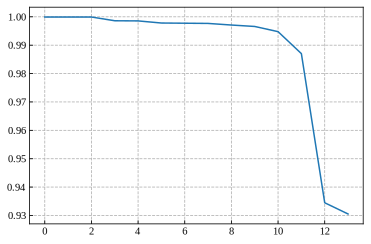

In [21]:
plt.plot(layer["score_test"])

In [52]:
np.arange(0.1,6,0.4)

array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.1, 4.5, 4.9,
       5.3, 5.7])

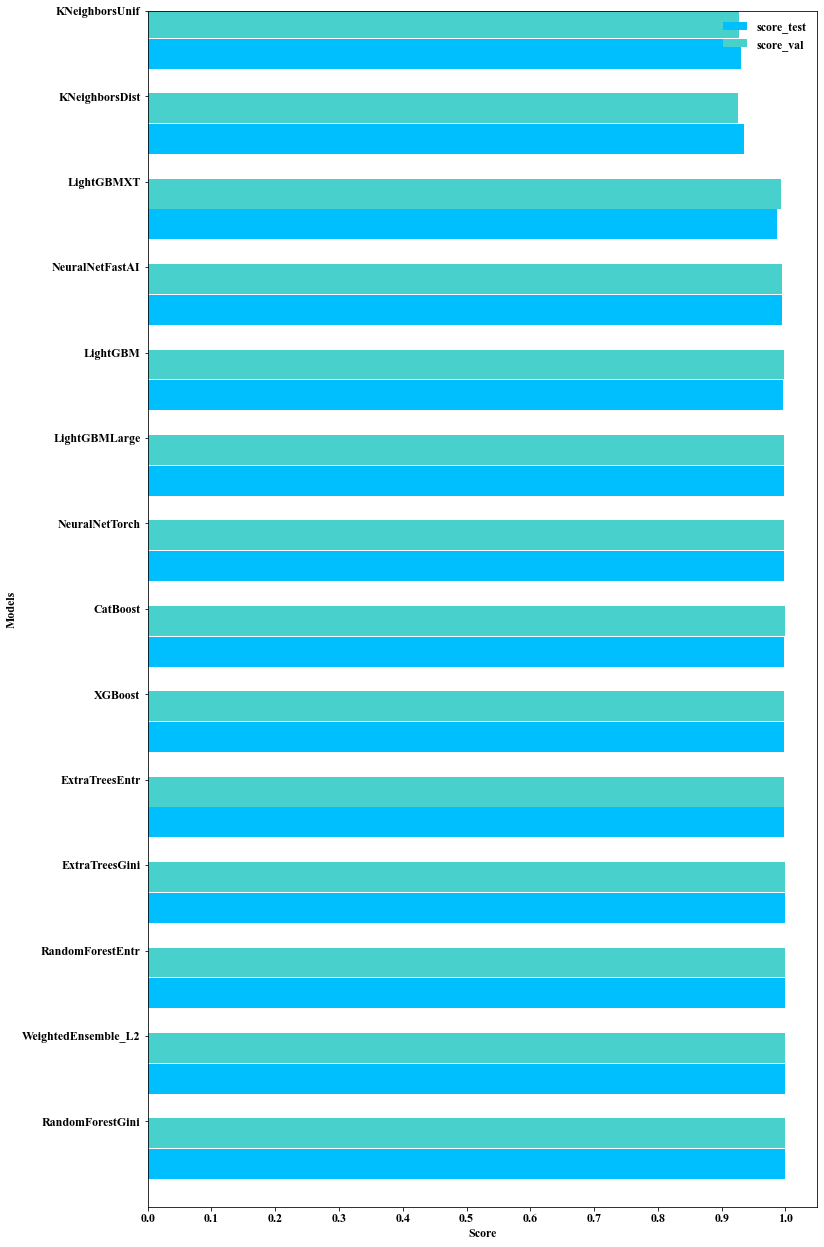

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
 
 
plt.figure(figsize=(12,22))
mpl.rcParams['font.sans-serif'] = ['Times New Roman']  
mpl.rcParams['font.weight'] = 'bold'  
mpl.rcParams['font.size'] = 12 
#for model ,test ,val  = in zip(models,score_tests,score_val):
plt.barh(np.arange(0.1,0.2*(14),0.2),score_tests,height=0.07,label='score_test',color='deepskyblue')
plt.barh(np.arange(0.1,0.2*(14),0.2)+0.072,score_val,height=0.07,label='score_val',color='mediumturquoise')
plt.legend(frameon=False,loc='upper right')
plt.ylim(0,2.8)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks(np.arange(0.2,0.2*(15),0.2), models, fontsize=12)
plt.ylabel('Models', fontsize=12,fontweight='bold')
plt.xlabel('Score', fontsize=12,fontweight='bold')


plt.savefig('./score.png', bbox_inches='tight', dpi=300)
plt.show()

In [76]:
models = layer.iloc[:,0].values
score_tests = layer.iloc[:,1].values
score_val = layer.iloc[:,2].values
pred_time_test = layer.iloc[:,3].values
pred_time_val = layer.iloc[:,4].values
fit_time = layer.iloc[:,5].values

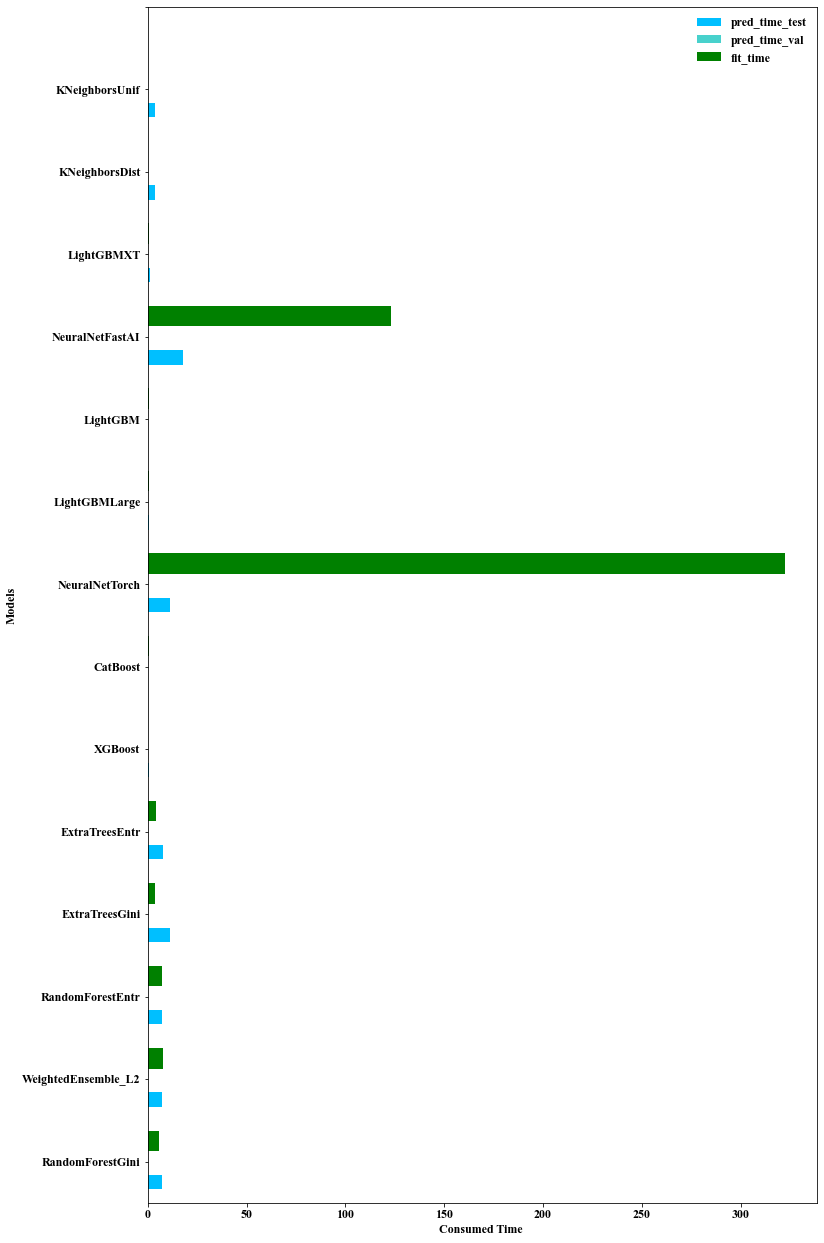

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
 
 
plt.figure(figsize=(12,22))
mpl.rcParams['font.sans-serif'] = ['Times New Roman']  
mpl.rcParams['font.weight'] = 'bold'  
mpl.rcParams['font.size'] = 12 
#for model ,test ,val  = in zip(models,score_tests,score_val):
plt.barh(np.arange(0.1,0.4*(14),0.4),pred_time_test,height=0.07,label='pred_time_test',color='deepskyblue')
plt.barh(np.arange(0.1,0.4*(14),0.4)+0.1,pred_time_val,height=0.07,label='pred_time_val',color='mediumturquoise')
plt.barh(np.arange(0.1,0.4*(14),0.4)+0.1*2,fit_time,height=0.1,label='fit_time',color='g')
plt.legend(frameon=False,loc='upper right')
plt.ylim(0,5)
plt.xticks(np.arange(0,350,50))
plt.yticks(np.arange(0.2,0.4*(15),0.4), models, fontsize=12)
plt.ylabel('Models', fontsize=12,fontweight='bold')
plt.xlabel('Consumed Time ', fontsize=12,fontweight='bold')


plt.savefig('./times_score.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
plt.subplot(122)
fb1=[0.799,0.826,0.815]# 4 7 10
fb2=[0.863,0.893,0.878]
fb3=[0.775,0.799,0.792]
fb4=[0.850,0.877,	0.865]
fb5=[0.77,0.760,0.806]
fb6=[0.847,0.873,0.877]
index_fb1=[1,2,3]
index_fb2=[1.2,2.2,3.2]
index_fb3=[1.1,2.1,3.1]
index_fb4=[1.3,2.3,3.3]
 
plt.bar(index_fb1,fb1,width=0.1,label='League Of Legend1',color='deepskyblue',zorder=1) 
plt.bar(index_fb2,fb2,width=0.1,label='League Of Legend2',color='deepskyblue',hatch='/',zorder=1)
plt.bar(index_fb3,fb3,width=0.1,label='League Of Legend3',color='mediumturquoise',zorder=1)
plt.bar(index_fb4,fb4,width=0.1,label='League Of Legend4',color='mediumturquoise',hatch='/',zorder=1)
for i in range(3):
    plt.scatter(index_fb3[i], fb5[i], s=40, marker="*", color='black',zorder=2)
    plt.scatter(index_fb4[i], fb6[i], s=40, marker="*", color='black',zorder=2)
plt.ylim(0,1.3)
plt.xticks([1.15, 2.15, 3.15], ['April','July', 'October'], fontsize=26)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.scatter(2.2,1.01, s=400, marker="*", color='black',zorder=2)#120
plt.text(2.25, 1, 'MVP')
plt.text(0.8, 1.32, '(b)')
plt.xlabel('Test Month', fontsize=10,fontweight='bold')
plt.ylabel('Accuracy', fontsize=10,fontweight='bold')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)